#Data Collection



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = pd.read_csv('/content/MSFT.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8525 entries, 1986-03-13 to 2020-01-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8525 non-null   float64
 1   High       8525 non-null   float64
 2   Low        8525 non-null   float64
 3   Close      8525 non-null   float64
 4   Adj Close  8525 non-null   float64
 5   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 466.2 KB


In [3]:
data.shape

(8525, 6)

In [4]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
1986-03-20,0.098090,0.098090,0.094618,0.095486,0.061432,58435200
1986-03-21,0.095486,0.097222,0.091146,0.092882,0.059756,59990400
1986-03-24,0.092882,0.092882,0.089410,0.090278,0.058081,65289600
1986-03-25,0.090278,0.092014,0.089410,0.092014,0.059198,32083200


# Data Preprocessing

In [5]:
data.fillna(method='ffill', inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Feature Engineering

In [6]:
sequence_length = 14
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i, 3])  # Using 'close price' as the target

X, y = np.array(X), np.array(y)

# Model Selection

In [7]:
train_size = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [8]:
X_train.shape

(6808, 14, 6)

In [9]:
X_train

array([[[0.00000000e+00, 5.94442228e-05, 0.00000000e+00, 4.32567884e-05,
         2.78272717e-05, 1.00000000e+00],
        [5.44673742e-05, 6.48476772e-05, 5.48528812e-05, 6.48851826e-05,
         4.17409075e-05, 2.97096179e-01],
        [7.62543239e-05, 7.02511315e-05, 7.67940336e-05, 7.57056091e-05,
         4.86914973e-05, 1.27119118e-01],
        ...,
        [4.90206368e-05, 2.70172717e-05, 3.29117287e-05, 3.24425913e-05,
         2.08704537e-05, 1.02668830e-02],
        [4.35738993e-05, 2.16138173e-05, 3.83970168e-05, 2.70354927e-05,
         1.73889307e-05, 8.53242321e-03],
        [3.81271619e-05, 3.24207260e-05, 3.83970168e-05, 3.24425913e-05,
         2.08704537e-05, 2.40026856e-02]],

       [[5.44673742e-05, 6.48476772e-05, 5.48528812e-05, 6.48851826e-05,
         4.17409075e-05, 2.97096179e-01],
        [7.62543239e-05, 7.02511315e-05, 7.67940336e-05, 7.57056091e-05,
         4.86914973e-05, 1.27119118e-01],
        [8.71540737e-05, 7.02511315e-05, 6.58234574e-05, 5.947808

# Model Training

In [10]:
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(200, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1)

Epoch 1/50
107/107 [==============================] - 14s 94ms/step - loss: 4.5743e-04
Epoch 2/50
107/107 [==============================] - 10s 97ms/step - loss: 3.9455e-05
Epoch 3/50
107/107 [==============================] - 10s 95ms/step - loss: 3.9071e-05
Epoch 4/50
107/107 [==============================] - 9s 84ms/step - loss: 3.3671e-05
Epoch 5/50
107/107 [==============================] - 10s 94ms/step - loss: 3.2978e-05
Epoch 6/50
107/107 [==============================] - 10s 94ms/step - loss: 3.1667e-05
Epoch 7/50
107/107 [==============================] - 10s 94ms/step - loss: 2.8637e-05
Epoch 8/50
107/107 [==============================] - 9s 87ms/step - loss: 2.8614e-05
Epoch 9/50
107/107 [==============================] - 10s 91ms/step - loss: 2.5661e-05
Epoch 10/50
107/107 [==============================] - 10s 94ms/step - loss: 2.4598e-05
Epoch 11/50
107/107 [==============================] - 10s 94ms/step - loss: 2.5902e-05
Epoch 12/50
107/107 [======================

# Evaluation

54/54 [==============================] - 2s 22ms/step
Mean Absolute Error: 7478972.420939129
Root Mean Squared Error: 12395129.910482476


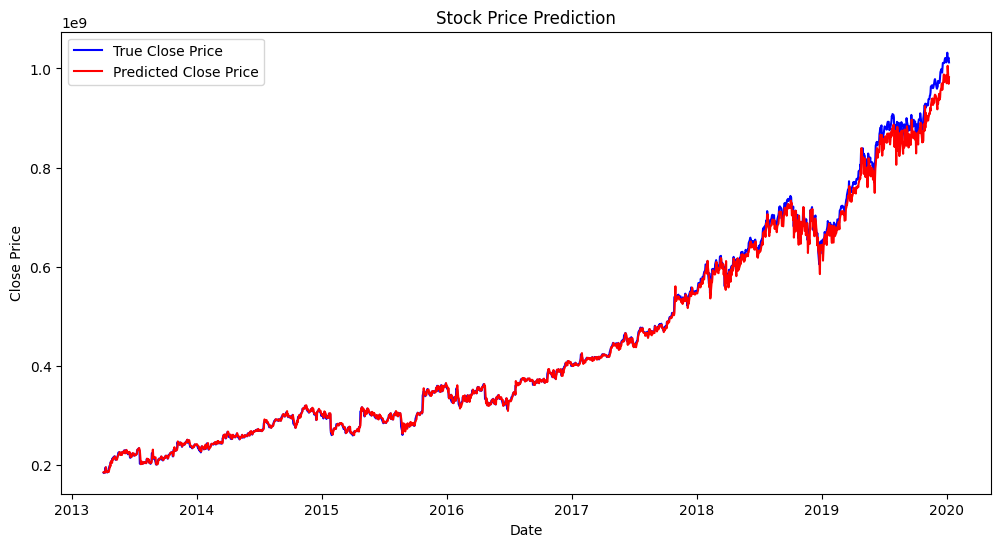

In [11]:
y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(np.hstack((np.zeros((len(y_pred), scaled_data.shape[1] - 1)), y_pred)))
y_test = scaler.inverse_transform(np.hstack((np.zeros((len(y_test), scaled_data.shape[1] - 1)), np.expand_dims(y_test, axis=1))))

y_pred_close = y_pred[:, -1]
y_test_close = y_test[:, -1]

mae = mean_absolute_error(y_test_close, y_pred_close)
rmse = np.sqrt(mean_squared_error(y_test_close, y_pred_close))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test_close, label='True Close Price', color='blue')
plt.plot(data.index[-len(y_test):], y_pred_close, label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()